In [252]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [253]:
# setup network
number_of_classes = 1
number_of_features = 1 #X_train.shape[1]
model = Sequential()
model.add(Dense(number_of_classes,activation = 'sigmoid',input_dim = number_of_features))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [254]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [255]:
# import data
data = np.genfromtxt('AllLocs.csv', delimiter=',')
x = np.array(data[:,22])
y = np.array(data[:,24])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

print(x)
print(y)

[47.88495559 54.06685895 13.24430684 24.6770214  13.75618967 30.67657914
 43.50000535 76.32500599 68.16898538 62.94959847 91.5980752  60.00786948
 81.10516922 55.44685669 80.21916098 69.31660884 22.52934203 32.00703432
 33.49744422 53.64031109 62.89505004 61.01005007 16.07093031 74.8204338
 54.29704599 64.38941545 72.52449609 22.16024005 63.11369299 72.32012219
 83.1004418  78.30923157 26.17492778 33.9946306  52.31298423 63.36894227
 60.94303323 52.72231954 25.44412598 67.65349826 46.22617904]
[1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0.]


In [256]:
# Train the model
model.fit(x_train, y_train, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 341ms/step - loss: 39.6566
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.6294
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.6023
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.5751
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.5480
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.5208
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.4937
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.4665
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 39.4394
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.4123
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.3851
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 39.3580
Epoch 13/2000
1/1 [================

In [257]:
# Evaluate the model
y_pred = model.predict(x_train).ravel()
fpr,tpr,thersholds = roc_curve(y_train,y_pred)
auROC = auc(fpr,tpr)
print(auROC)

y_pred = model.predict(x_test).ravel()
fpr,tpr,thersholds = roc_curve(y_test,y_pred)
auROC = auc(fpr,tpr)
print(auROC)

y_pred = model.predict(x).ravel()
fpr,tpr,thersholds = roc_curve(y,y_pred)
auROC = auc(fpr,tpr)
print(auROC)

1/1 [==============================] - 0s 59ms/step
0.679144385026738
1/1 [==============================] - 0s 23ms/step
0.7380952380952381
2/2 [==============================] - 0s 2ms/step
0.7367149758454106


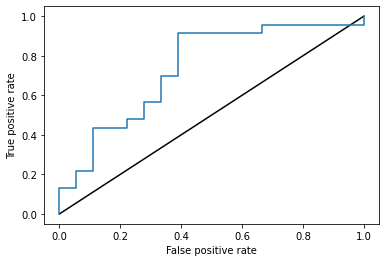

In [258]:
plt.figure(1)
plt.plot([0,1],[0,1],'k-')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
